In [2]:
import Pkg
Pkg.add("StatsBase")
Pkg.add("HypothesisTests")
using PyPlot
using Distributions
using DelimitedFiles
using Statistics
using StatsBase
using Random
using HypothesisTests

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


$$
\begin{align}
{x} & = \sigma(y-x) \tag{3-1}\\
{y} & = \rho x - y - xz \tag{3-2}\\
{x+y+z} & = -\beta z + xy \tag{3-3}
\end{align}
$$

# Day 3 Frequentist statistics

3.1 Interval estimation      
3.2 Hypothesis testing  
3.3 Some common tests  
3.4 Summary and additional questions  

## Recap of last week...

* Common distributions: Bernoulli, Binomial, Poisson, Normal, Gamma and $\chi^2$  


* Characteristic functions $\phi_X(t)=\langle e^{itX} \rangle$  


* Statistics of a sample $X_1$, $X_2, \cdots, X_n$ from a population with $\mu$ and $\sigma^2$


$\hspace{0.8cm}$ sample mean $\overline{X}=\frac{1}{n}\sum_{k=1}^nX_n$ where $\langle \overline{X} \rangle=\mu$ 


$\hspace{0.8cm}$ sample variance $s^2_u=\frac{1}{n-1}\sum_{k=1}^n(X_k-\overline{X})^2$ where $\langle s_u^2\rangle=\sigma^2$


* Law of large numbers $\overline{X}_n\to\mu$ for many samples


* Central limit theorem: distribution of $\overline{X}_n$ tends to a normal   
with mean $\mu$ and variance $\sigma^2/n$. NB $\sigma/n^{1/2}$ is the **standard error on mean**.


# 3.1 Interval estimation

3.1.1 Analysis of house-price data  
3.1.2 Confidence intervals  
3.1.3 Question on confidence intervals

## 3.1.1 Analysis of house-price data

* UK House price data. 374,043 properties less than or equal to £2M by Nov 2020.


* Population mean=£290k and std=£234k so highly skewed distribution.


* Imagine we draw a sample of $n=50$.


* For a particular sample we get point esimations:  
sample mean $\mu_s=$£312k, sample std $\sigma_s$=£213k and standard error on mean $\sigma_{sem}=$£30k



* How can we estimate a range that the population mean might be in?


* Let the $95\%$ confidence interval be the range encompassing the central 95$\%$   
of the normal distribution with $\mu_s$, $\sigma_s$.  


* **<font color='red'>Question:</font>** Use invlogcdf in the Distributions package to find this range.


## 3.1.1 Analysis of house-price data

* UK House price data. 374,043 properties less than or equal to £2M by Nov 2020.


* Population mean=£290k and std=£234k so highly skewed distribution.


* Imagine we draw a sample of $n=50$.


* For a particular sample we get point esimations:  
sample mean $\mu_s=$£312k, sample std $\sigma_s$=£213k and standard error on mean $\sigma_{sem}=$£30k


* How can we estimate a range that the population mean might be in?


* Let the $95\%$ confidence interval be the range encompassing the central 95$\%$   
of the normal distribution with $\mu_s$, $\sigma_s$.  


* **<font color='green'>Answer:</font>** 

$\hspace{0.8cm}$ zL=invlogcdf(Normal(),log(0.025))=-1.96  
$\hspace{0.8cm}$ p=£312k $\pm$ zL*£30k$~=~$£253k$\to$£371k 


 * So the confidence interval is between £253k to £371k


In [6]:
# load data
M=readdlm("pp-2020.csv",',')
L,l=size(M);

P=M[:,2]
s2M=findall(P.<=2000000)
P2M=P[s2M]/1000; # measure prices in £k

# prices less than or equal to £2M are in the vector P2M

Random.seed!(12)

# sample means
ns=50
N=10000;

# one sample first
samp=rand(P2M,ns)
Esampmean=mean(samp)
Esampvar=var(samp)
Esampstd=std(samp)
Esampsem=Esampstd/sqrt(ns)

# now repeated samples
R=mean(rand(P2M,N,ns),dims=2);

# and population data
popmean=mean(P2M);
popvar=var(P2M);
popstd=std(P2M);
popsem=popstd/sqrt(ns);

println("Number in 2020 <£2M is $(length(P2M))")
println("ns=$ns sample:\t mean=$(round(Esampmean;digits=0))k std=$(round(Esampstd;digits=0))k so sem=$(round(Esampsem;digits=0))k")
println("The population\t mean=$(round(popmean;digits=0))k std=$(round(popstd;digits=0))k ")


Number in 2020 <£2M is 374043
ns=50 sample:	 mean=312.0k std=213.0k so sem=30.0k
The population	 mean=290.0k std=234.0k 


In [8]:
# get 95% confidence intervals 

zL=invlogcdf.(Normal(),log(0.025))
zR=invlogcdf.(Normal(),log(1-0.025))
PL=zL*Esampsem+Esampmean
PR=zR*Esampsem+Esampmean

# for the sample example
xE=Esampmean-5*Esampsem:1:Esampmean+5*Esampsem;
yE=pdf.(Normal(Esampmean,Esampsem),xE)    

xEL=collect(xE[1]:0.01:PL);
yEL=pdf.(Normal(Esampmean,Esampsem),xEL);

xER=collect(PR:0.01:xE[end])
yER=pdf.(Normal(Esampmean,Esampsem),xER)

# statistics of sample means
xP=popmean-5*popsem:1:popmean+5*popsem
yP=pdf.(Normal(popmean,popsem),xP);

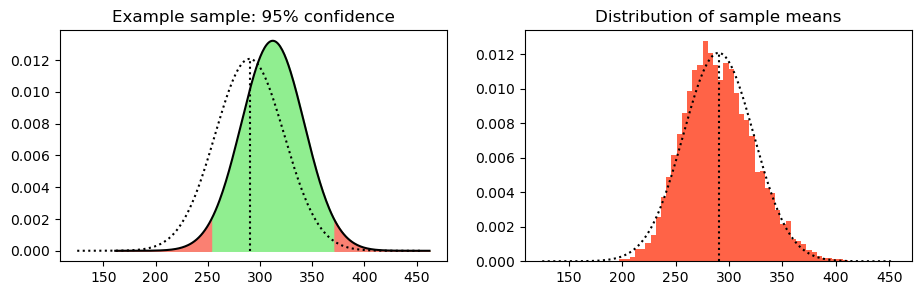

In [10]:
figure(figsize=(11,3)); tight_layout;

subplot(121); plot(xE,yE,"k-",xP,yP,"k:"); 
plot(popmean*[1,1],[0,maximum(yP)],"k:"); 
title("Example sample: 95% confidence"); fill_between(xE,0,yE,color="lightgreen");
fill_between(xEL,0,yEL,color="salmon"); fill_between(xER,0,yER,color="salmon")

subplot(122);plt.hist(R,50,density=1,color="tomato");
plot(popmean*[1,1],[0,maximum(yP)],"k:"); 
plot(xP,yP,"k:"); title("Distribution of sample means");

## 3.1.2 Confidence intervals

* **NB** Confidence intervals are random quantities - depend on a sample.


* Often misunderstood! 


* A 95$\%$ confidence interval means that 95$\%$ of confidence intervals will include the population mean. 


* In frequentist statistics the population mean is **not** considered a random quantity that would have some probability of taking a particular value.   

## 3.1.3 <font color='red'>Question:</font> confidence intervals

* 100 samples from a chocolate-bar machine had weights with   
mean $\mu_s=101$g and standard deviation $\sigma_s$=$5$g.


* Give 99$\%$ confidence limits for the mean weight of all bars made.

## 3.1.3 <font color='green'>Answer:</font> confidence intervals

* 100 samples from a chocolate-bar machine had weights with   
mean $\mu_s=101$g and standard deviation $\sigma_s$=$5$g.


* Give 99$\%$ confidence limits for the mean weight of all bars made.


* Standard error on the mean is $5/\sqrt{100}=0.5$


* For a standard normal invlogcdf(Normal(),log(0.005))=-2.576


* Hence the weight range is $-2.576*0.5+101$ to $2.576*0.5+101$   
which is 99.7g to 102.3g.


# 3.2 Hypothesis testing

3.2.1  Type I and Type II errors  
3.2.2  Significance and p-values  
3.2.3  Type II errors and operator curves

## 3.2.1 Type I and Type II errors

* Want to distinguish between a null hypothesis $H_0$ and other hypothesis $H_1$ etc .


* Frequentist statistics: concerned with decisions made about the null hypothesis.


* Four possibilities: null can be true or false and we can accept or reject it.

| $~$ | true | false |
|---: | :---- | :--- |
| **accept** | success | type-II error |
| **reject** | type-I error | success |  


* Type I error: probability reject a true null hypothesis $P($reject$~ | ~$null true$)$  
Use $\alpha$ for type-I error "rate". Can be considered an error of commission.


* Type II error: we accept a false null hypothesis  $P($accept$~ | ~$null false$)$  
Use $\beta$ for type-II error "rate". Can be considered an error of omission


* Type I errors tend to be main focus.  
Related to **falsifiability** of an existing theory.  
Fits with Popper's idea of good theories being falsifiable. 

## 3.2.1 Type I and II error example

* 100 patients are tested for stroke using a new, quick test   
* The null hypothesis is that patients are healthy.  
* Health or stroke is then confirmed clinically, later. 


| $~$ | healthy | stroke |
|---| --- | ---|
| **test predicts healthy** | 88 |4 |
| **test predicts stroke** | 2  | 6 |


* **<font color="red">Question:</font>** What is the type-I error rate?  


* **<font color="red">Question:</font>** What is the type-II error rate?   

## 3.2.1 Example of type I and II errors 

* 100 patients are tested for stroke using a new, quick test   
* The null hypothesis is that patients are healthy.  
* Health or stroke is then confirmed clinically, later. 

| $~$ | healthy | stroke | |
|---| --- | ---| ---|
| **predicts healthy** | 88 |4 | 92 |
| **test predicts stroke** | 2  | 6 | 8 |
| $~$ | 90 | 10 | 100 |


* **<font color="green">Answer:</font>** What is the type-I error rate?  
$P($predict stroke$~ | ~$healthy$)=1/45$ 


* **<font color="green">Answer:</font>** What is the type-II error rate?  
$P($predict healthy$~ | ~$stroke$)=2/5$   


* **NOTE** There are other quantities that sound similar.   
$P($healthy$~ | ~$predict stroke$)$   
$P($stroke$~ | ~$predict healthy$)$  


* Frequentist $~\sim P($Data$~ | ~$Null hypothesis$ )$  
* Bayesian $~\sim P($Hypotheses$~ | ~$Data$)$

## 3.2.2 Significance and p-values

The p-value is the probability you get the results you found or something more extreme, given the null hypothesis is true.  

** Example ** Test if a coin is fair - this is the **null** hypothesis.


* We imagine doing one experiment with $n$ flips.


* If coin not fair anticipate result will look unlikely from null statistics.


* We fix ahead a probability level $\alpha$ - the **significance** - type I error rate.  
This the level at which we reject the null because result unlikely if null true.  
Typically this is set at $5\%$ or $1\%$.


* Do an experiment and measure the p-value. The probability 

** Experiment **   
Coin flip gives 7 heads out of 8 flips. What is the p-value? Is it significant at $5\%$?


|heads | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 
|:---  |---|---|---|---|---|---|---|---|---|
|**prob** | 0.004 | 0.0312 | 0.1094 | 0.2188 | 0.2734 | 0.2188 | 0.1094 | 0.0312 | 0.004 |


* As extreme is 0,1 7 or 8 heads so p-value is $2\times(0.004+0.0312)=7\% $.
* Call this ** Not sigificant ** as greater that then $\alpha=5\%$ cut-off.
* This is a two sided test. 


* Imagine if we were testing if the coin was biased towards heads.  
As extreme are 7 or 8, so p-value$=3.5\%$ which is significant at the $5\%$ level.

## 3.2.2 <font color='red'>Question</font> Significance and p-values

* A nationwide school test has mean mark $\mu=75$ with standard dev. $\sigma=7$.
* A particular school with 30 children has a mean mark $\mu_s=72$ .


* **<font color='red'>Question.</font> ** Is the school significantly different from the national average?  
Give the p-value and compare to $5\%$.



* Hint 1: use cdf(Normal()) to calculate the area under the normal curve.
* Hint 2: you can use invlogcdf to go from the cdf to x, when necessary.


## 3.2.2 <font color='green'>Answer</font> Significance and p-values

* A nationwide school test has mean mark $\mu=75$ with standard dev. $\sigma=7$.
* A particular school with 30 children has a mean mark $\overline{X}=72$ .


* **<font color='green'>Answer.</font> ** The standard error on the mean is $7/\sqrt{30}=1.278$.
* Null sample-mean distribution: normal with mean $\mu_s=75$, $\sigma_s=1.278$.

* This sample mean: $z=(72-\mu_s)/\sigma_s=-2.35$ deviations from mean.
* cdf(Normal(),-2.35)=0.0094 so p-value$=1.8\%$   
signifance at 5$\%$ but not 1$\%$.  


* **NB** It's a two-sided test so $2\times0.0094=1.8\%$.


In [20]:
mus,sigs=75,1.278
x1=mus-5*sigs:0.01:mus+5*sigs
y1=pdf.(Normal(mus,sigs),x1);

# Two-sided test at 95%
zL=invlogcdf.(Normal(),log(0.025));   xL=zL*sigs + mus
zR=invlogcdf.(Normal(),log(1-0.025)); xR=zR*sigs + mus

x2=x1[1]:0.01:xL
y2=pdf.(Normal(mus,sigs),x2);

x3=xR:0.01:x1[end]
y3=pdf.(Normal(mus,sigs),x3);

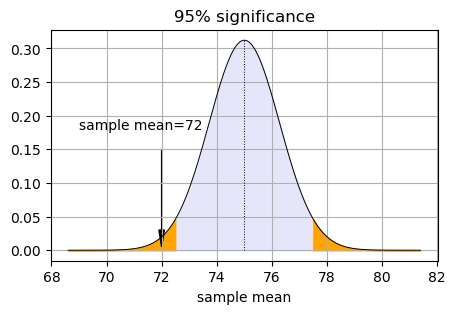

In [6]:
figure(figsize=(5,3))
fill_between(x1,0,y1,color="lavender"); fill_between(x2,0,y2,color="orange")
fill_between(x3,0,y3,color="orange"); grid(); text(69,0.18,"sample mean=72")
plot(x1,y1,"k",linewidth=0.7); title("95% significance")
plot([75,75],[0,maximum(y1)],"k:",linewidth=0.7); xlabel("sample mean")
arrow(72,0.15,0,-0.12, head_width=0.2, head_length=0.025, fc="k", ec="k");

## 3.2.3 Type II errors and operator curves

* Decide coin fair: 100 flips there are between $40-60$ heads (inclusive).


* The type I error rate is therefore $\alpha=0.0352$.


* Imagine $p=0.6$   
**<font color='red'>Question:</font>** what is the type II error $\beta$?


In [20]:
cdf(Binomial(100, 0.6), 60)-cdf(Binomial(100, 0.6), 39)

0.5379066176516065

## 3.2.3 Type II errors and operator curves

* Decide coin fair: 100 flips there are between $40-60$ heads (inclusive).


* The type I error rate is therefore $\alpha=0.0352$.



* Imagine $p=0.6$   
**<font color='green'>Answer:</font>** $\beta=\sum_{k=40}^{60}$Binom$(k;n=100,p=0.6)=0.538$
* Remember $\beta$ is the **probability accept null given it is false**


* At $p=0.7$ it has dropped to $\beta=0.021$ or 2$\%$ chance.


* Plot $\beta$ as a function of $p$. This is the operator curve.

In [7]:
x=collect(0:100)
x1,x2=40,60
xx=collect(x1:x2)

y0=pdf.(Binomial(100,0.5),x);
yy0=pdf.(Binomial(100,0.5),xx);
s1=findall(x.==x1)[1];
s2=findall(x.==x2)[1];

p1,p2=0.4,0.6
y1=pdf.(Binomial(100,p1),x)
y2=pdf.(Binomial(100,p2),x)

# type one error
a=1-sum(y0[s1:s2])

pr=collect(0.1:0.01:0.9);
np=length(pr)
br=zeros(np)
for k=1:np
    yr=pdf.(Binomial(100,pr[k]),x)
    br[k]=sum(yr[s1:s2])
end

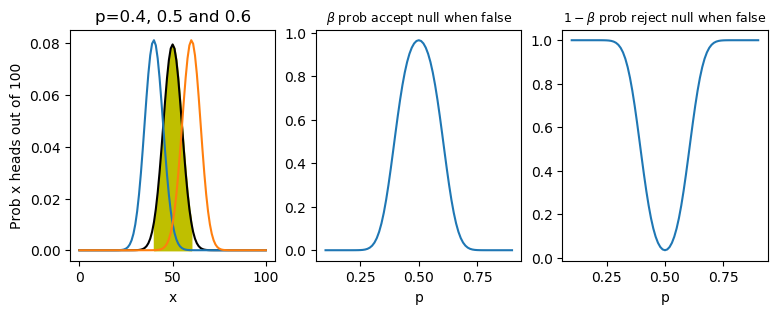

In [8]:
figure(figsize=(9,3)); tight_layout;
subplot(131); plot(x,y0,"k-",x,y1,x,y2); xlabel("x");
fill_between(xx,0,yy0,color="y")
ylabel("Prob x heads out of 100");   title("p=$p1, 0.5 and $p2")
subplot(132); plot(pr,br); xlabel("p"); 
title(L"$\beta$ prob accept null when false",fontsize=9);
subplot(133); plot(pr,1.0 .-br); xlabel("p"); 
title(L"$1-\beta$ prob reject null when false",fontsize=9);

# 3.3 Some common tests

3.3.1 One-sample test  
3.3.2 Two-sample test  
3.3.3 Student's t test  
3.3.4 Chi-square test  


## 3.3.1 One sample test

* Consider the sample mean $\overline{X}$ of a set $\{X_k \}$of $n$ random numbers.


* Assume $n$ sufficiently large that the sample-mean distribution is normal.


* Get an unbiased estimate of population $\sigma$ from data ($n$ should be big for this).


* Null hypothesis is that the sample mean is $\mu_0$ (often $0$, as can subtract this out).


* This is called a **z-test**: examine z-statistic $z=(\overline{X}-\mu_0)/(\sigma/\sqrt{n})$ for significance 



In [9]:
n=10
X=randn(n) .+0.1; 
mx=mean(X); sx=std(X); semx=sx/sqrt(n); 
zscore=mx/semx; pvalue=2*cdf.(Normal(),-abs(zscore))
println("X=$(round.(X;digits=2))")
println("mean(X)=$(round(mx;digits=3)) and sem(X)=$(round(semx;digits=3))")
println("z-score=$(round(zscore;digits=3)) and pvalue=$(round(pvalue;digits=3))")
println("------------------------------")
OneSampleZTest(X)

X=[0.26, 0.19, 0.03, 1.86, 0.92, -0.59, 0.89, -0.51, -2.06, -0.2]
mean(X)=0.078 and sem(X)=0.333
z-score=0.235 and pvalue=0.814
------------------------------


One sample z-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0
    point estimate:          0.07821569756813056
    95% confidence interval: (-0.5751, 0.7315)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.8145

Details:
    number of observations:   10
    z-statistic:              0.2346438287244101
    population standard error: 0.3333379701197901


## 3.3.2 Two-sample test

* Now consider we have two sets of number $\{X_k\}$ and $\{Y_k\}$ 


* There are $n_x$ and $n_y$ of these, the sample means are $\overline{X}$ and $\overline{Y}$ and the population variance esimators $\sigma_x$ and $\sigma_y$.


* Are the sample means the same or different? Consider statistics of $\overline{X}-\overline{Y}$


* The variance of the difference is $\sigma_x^2/n_x+\sigma_y^2/n_y$.


* The test statistic is therefore $z=\frac{(\overline{X}-\overline{Y})}{\sqrt{\sigma_x^2/n_x+\sigma_y^2/n_y}}$ which we test for significance.

In [10]:
nx=10; X=randn(nx) .+0.1; 
ny=15; Y=1.2*randn(ny) .+0.2;
UnequalVarianceZTest(X,Y)

Two sample z-test (unequal variance)
------------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          0.01451762522670172
    95% confidence interval: (-0.5467, 0.5758)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.9596

Details:
    number of observations:   [10,15]
    z-statistic:              0.050696480331314374
    population standard error: 0.2863635726154035


## 3.3.3 Student's t test

* Developed for small sample where typically $n\leq30$ is quoted.
* The z-score comes from a standardised normal $z=(\bar{X}-\mu)/(\sigma/\sqrt{n})$  


* Previously assumed that esimate $s^2_u$ for population $\sigma^2$ is sharp


* But $s^2_u$ is a random number too increasing uncertainty  
  distribution $t=(\bar{X}-\mu)/(s_u/\sqrt{n})$ is **not** normal  


* Follows t-distribution (if samples normal). $Y=Y_0(1+t^2/(n-1))^{-n/2}$.  
similar to normal, but tails fatter 


* t-tests are preformed exactly like z-tests.

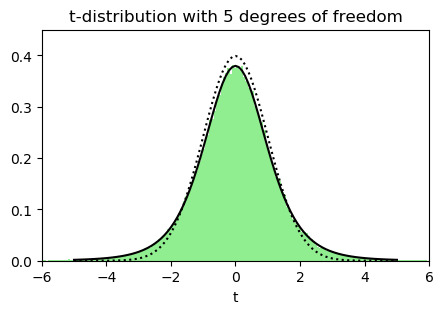

PyObject Text(0.5, 1.0, 't-distribution with 5 degrees of freedom')

In [11]:
# example
N,n=100000,6
M=randn(N,n);
Sm=mean(M,dims=2)
Sv=var(M,dims=2)
t=Sm./sqrt.(Sv/n);

figure(figsize=(5,3))
x=-5:0.1:5
y1=pdf.(Normal(),x)
y2=pdf.(TDist(n-1),x)
plt.hist(t,400,normed=5,color="lightgreen");
plot(x,y1,"k:",x,y2,"k-"); xlabel("t")
axis([-6,6,0,0.45]); title("t-distribution with $(n-1) degrees of freedom")

## 3.3.4 Chi-square test

* This test is used for seeing if a distribution of numbers is as expected.


* Let $a_k$ where $k=1\cdots n$ be the measured frequency and $b_k$ that expected.


* The test statistics is $\chi^2=\sum_{k=1}^n\frac{(a_k-b_k)^2}{b_k}$.


* It has a sampling distribution is $Y(\chi^2)=\frac{1}{2^{\nu/2}\Gamma(\nu/2)}(\chi^2)^{(\nu-2)/2}e^{-\chi^2/2}$  
where $\nu=n-1$. This is a $\chi^2$ distribution with $n-1$ degrees of freedom.


* **<font color='red'>Question:</font>** A six-sided die is rolled 120 times with frequencies:

| 1  | 2   | 3   | 4   | 5   | 6   |
| ---| --- | --- | --- | --- | --- |
|   17 | 14    | 19    | 15    | 21    |  34   |  

* Is the die a fair one? Test at $95\%$ and $99\%$ and give the p-value. 

In [230]:
b = [17, 14, 19, 15, 21, 34]
a = ones(6)*20
chisq = sum((a.-b).^2 ./a)
print(chisq, ", ")
1-cdf(Chisq(5), chisq)

# we reject H_0 at 1% L.O.S but accept at 5%.

# the p-value tells you the probability of being more extreme than this value given it is distributed fairly/uniformly.

invlogcdf(Chisq(5), log(0.99))
invlogcdf(Chisq(5), log(0.95))

13.4, 

11.070497693516351

In [224]:
val = zeros(6)
for i in 1:6
    val[i] = (b[i]-20)^2/b[i]
end
chisqq = sum(val)

10.632463511720477

## 3.3.4 Chi-square test


* The test statistics is $\chi^2=\sum_{k=1}^n\frac{(a_k-b_k)^2}{b_k}$.


* It has a sampling distribution is $Y(\chi^2)=\frac{1}{2^{\nu/2}\Gamma(\nu/2)}(\chi^2)^{(\nu-2)/2}e^{-\chi^2/2}$   
where $\nu=n-1$. This is a $\chi^2$ distribution with $n-1$ degrees of freedom.


* **<font color='green'>Answer:</font>** A six-sided die is rolled 120 times with frequencies:

| 1  | 2   | 3   | 4   | 5   | 6   |
| ---| --- | --- | --- | --- | --- |
|   17 | 14    | 19    | 15    | 21    |  34   |  

* $\chi^2=3^2/20+6^2/20+1^2/20+5^2/20+1^2/20+14^2/20=13.4$      
and $\nu=6-1=5$.

In [12]:
a=[17.0, 14.0, 19.0, 15.0, 21.0, 34.0];
b=[20.0,20.0,20.0,20.0,20.0,20.0];
chi2=sum((a-b).^2 ./b)
pvalue=1-cdf.(Chisq(5),chi2)
xx95=invlogcdf.(Chisq(5),log(0.95))
xx99=invlogcdf.(Chisq(5),log(0.99))

xx1=collect(0.01:0.01:20); y1=pdf.(Chisq(5),xx1);
xx2=collect(xx95:0.01:xx1[end]); y2=pdf.(Chisq(5),xx2);
xx3=collect(xx99:0.01:xx1[end]); y3=pdf.(Chisq(5),xx3);

println("chi2=$chi2 pvalue=$(round(pvalue;digits=4)) xx95=$(round(xx95;digits=4)) xx99=$(round(xx99;digits=4))")

chi2=13.4 pvalue=0.0199 xx95=11.0705 xx99=15.0863


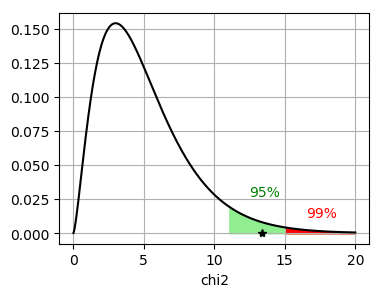

In [13]:
figure(figsize=(4,3))
plot(xx1,y1,"k-"); xlabel("chi2"); plot(chi2,0,"k*")
fill_between(xx2,0,y2,color="lightgreen"); text(12.5,0.027,"95%",color="green")
fill_between(xx3,0,y3,color="r"); text(16.5,0.012,"99%",color="r")
grid("on")

In [14]:
# can also use one of the HypothesisTests commands...

aInt=Int.(a);
ChisqTest(aInt)

Pearson's Chi-square Test
-------------------------
Population details:
    parameter of interest:   Multinomial Probabilities
    value under h_0:         [0.166667, 0.166667, 0.166667, 0.166667, 0.166667, 0.166667]
    point estimate:          [0.141667, 0.116667, 0.158333, 0.125, 0.175, 0.283333]
    95% confidence interval: Tuple{Float64,Float64}[(0.0583, 0.2321), (0.0333, 0.2071), (0.075, 0.2487), (0.0417, 0.2154), (0.0917, 0.2654), (0.2, 0.3737)]

Test summary:
    outcome with 95% confidence: reject h_0
    one-sided p-value:           0.0199

Details:
    Sample size:        120
    statistic:          13.399999999999995
    degrees of freedom: 5
    residuals:          [-0.67082, -1.34164, -0.223607, -1.11803, 0.223607, 3.1305]
    std. residuals:     [-0.734847, -1.46969, -0.244949, -1.22474, 0.244949, 3.42929]


###### 3.4 Summary and additional questions

# 3.4 Summary and additional questions


## Day 3 Frequentist approach

3.1 Interval estimation      
3.2 Hypothesis testing  
3.3 Additional topics  
3.4 Summary and homework questions 

---

## Questions

Make sure you have understood and done all the questions in the lectures.

The questions below are to be emailed in for marking by 12noon Thursday 26th November 2020    
**NB** there will also be questions from the Day 4 lectures to be handed in on the 26th November as well.

**Q3.4.1** Spotting fake financial data  
**Q3.4.2** One-sided and two-sided test differences   
**Q3.4.3** Limit of Student's t-distribution.

## <font color='red'>Q3.4.1</font> Spotting fake data

* The first non-zero digits of numbers in many real-world data sets do not follow a uniform distribution.
* This observation is called Benford's law, where $P(d)=\log_{10}(1+1/d)$ for $d=1\cdots9$
* When financial data is naively faked, a uniform random number generator is often used. 
* Download the following csv file from the Nasdaq archive:  
old.nasdaq.com/screening/companies-by-industry.aspx?exchange=NASDAQ&render=download
* The third column is the current stock prices. The data has some entries that are "n/a" which you need to clean up.

* **Part (a)** For a random  sample of 45 stocks, plot the distribution of the first digits of the stock prices.

* **Part (b)** Use the Chi-square test to check if the distribution is significantly different from a uniform distribution and from Benford's law. Give the p-value for these two tests.

* **Part (c)** Increase the sample to 450. Comment on what happens to the significance test in respect to Benford's law.

The p-statistic for the Chi-Squared test for the null-hypothesis: 'The data is Uniformly distributed' is p = 6

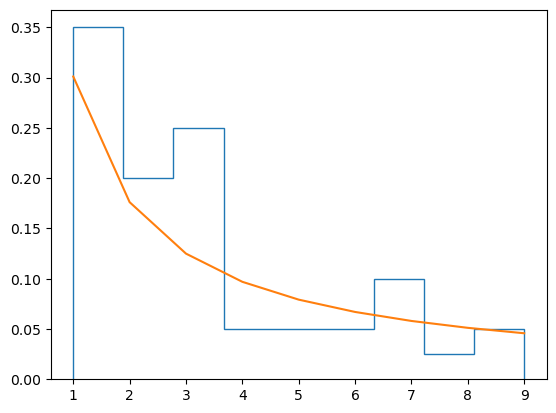

.3494301838495915e-6
 
The p-statistic for the Chi-Squared test for the null-hypothesis: 'The data is distributed according to Benfords Law' is p = 0.7602203453880295

0.000517446393924148

In [4]:
C = readdlm("companylist.csv", ',');

#sorting data and finding first digit

Dig = filter(x->typeof(x) == Float64 || typeof(x) == Int64, C[:,3]) # gets rid of all "n/a" values
Ford = zeros(length(Dig))

for i in 1:length(Dig)
    Entry = Dig[i]
    decdigits = split("$Entry", "") # converts to array of strings
    digits = filter(x -> x !=".", decdigits) # gets rid of decimal point if exists
    Ben = findfirst(x->x !="0", digits) # finds index of first non-zero digit
    Ford[i] = parse(Int64, digits[Ben]) # converts back to number
end

#plotting distribtion versus expectation according to Benford's Law

test = sample(Ford, 45)
plt.hist(test, 9, density =1, histtype = "step")
set = collect(1:9)
plot(set, log10.(1 .+1 ./set))


#ChiSquared Calculation

test = sample(Ford, 45)
d = [count(x->x==i,test) for i in set]

b = 45*log10.(1 .+1 ./set) # Expected values by Benford's Law

ChiSq_U = sum((d.-5).^2)/5 # The expectation for a Uniform distribution would be (1/9)*45 = 5
ChiSq_B = sum(((d.-b).^2)./b)

pU = 1-cdf(Chisq(9-1), ChiSq_U)
pB = 1-cdf(Chisq(8), ChiSq_B)

print("The p-statistic for the Chi-Squared test for the null-hypothesis: 'The data is Uniformly distributed' is p = ", pU, "\n \n")
print("The p-statistic for the Chi-Squared test for the null-hypothesis: 'The data is distributed according to Benfords Law' is p = ", pB)

TEST = sample(Ford, 450)
# plt.hist(test, 9, density =1, histtype = "step")
# plot(set, log10.(1 .+1 ./set))
D = [count(x->x==i,TEST) for i in set]
B = 450*log10.(1 .+1 ./set)# Expected values by Benford's Law
ChiSq_BL = sum(((B.-D).^2)./B)
pBL = 1-cdf(Chisq(8), ChiSq_BL)

# p-values are consistently lower for a larger sample size.

0.0003242986250909796

In [16]:
pB = zeros(5)
pBL = zeros(5)

for j in 1:5
    test = sample(Ford, 45)
    TEST = sample(Ford, 450)
    d = [count(x->x==i,test) for i in set]
    D = [count(x->x==i,TEST) for i in set]
    b = 45*log10.(1 .+1 ./set)
    B = 450*log10.(1 .+1 ./set)
    ChiSq_B, ChiSq_BL = sum(((b.-d).^2)./b), sum(((B.-D).^2)./B)
    pB[j], pBL[j] = 1-cdf(Chisq(8), ChiSq_B), 1-cdf(Chisq(8), ChiSq_BL)
end
hcat(pB, pBL)

5×2 Array{Float64,2}:
 0.37568   0.393246   
 0.916503  0.000839864
 0.1685    2.33499e-7 
 0.770799  0.168959   
 0.369827  2.79527e-5 

The array above compares small and large sample size $p$-values. We can see without much analysis that the $p$-values for a sample size of 450 are frequently less than the $\alpha = 1%$ level of signficance. This may be surprising because we might expect that with a larger sample size, the distribution gets closer to what Benford's Law predicts.

However a feature of the $\chi ^2$ test is that it's potency in determining the goodness of fit reduces for larger sample sizes. This is owing to the fact that the magnitude of $\chi ^2$ scales with the number of data points, i.e the numerator in the summation is not squared.


## <font color='red'>Q3.4.2</font> One-sided and two-sided test differences.

* Refer back to the question in section 3.2.2 on the nationwide school test.


* A nationwide school test has mean mark $\mu=75$ with standard dev. $\sigma=7$.
* A particular school with 30 children has a mean mark $\overline{X}=72$ .


* Test the data for the question:   
Is the school underpreforming?   
What is the p-value and compare it to $5\%$ or $1\%$ significances.


If we took a large number of samples, size $n=30$, we would expect the distribution to follow a $ N(75, \frac{7^2}{30})$ distribution. And so the corresponding $p$-value is calculated as `cdf(Normal(75, 7/sqrt(30)), 72) = 0.00945 (2sf)`. So $p = 0.945 \% $ and we reject the null-hypothesis ($H_0$: The school is performing averagely) at the 5% and 1% level of significance. NB: We do not compare to 0.5% and 2.5% respectively since this is now a one-tailed test.

In [19]:
cdf(Normal(75, 7/sqrt(30)), 72)

0.009452920389165925

## <font color='red'>Q3.4.3</font> Limit of Student's t-distribution

* **Part (a)**  Student's t-distribution is 


$\hspace{0.8cm}$ $f(t)=\frac{1}{\sqrt{\nu\pi}}\frac{\Gamma\left(\frac{\nu+1}{2}\right)}{\Gamma\left(\frac{\nu}{2}\right)}\frac{1}{\left(1+t^2/\nu\right)^{(\nu+1)/2}}$


$\hspace{8mm}$where $\nu=n-1$ is the number of degrees of freedom. 

*  Demontrate that in the limit of large $n$ this distribution tends to a standard normal.



* **Part(b)** Show that for large $\nu$ the leading order correction to the variance is $\sigma^2\simeq1+2/\nu$ and therefore larger than that of the standard normal.



$\nu$

# Question 3.4.3

### Part (a) 

Our task is to show that $$f(t) = \lim_{\nu\to\infty} \frac{1}{\sqrt{\nu\pi}}\frac{\Gamma\left(\frac{\nu+1}{2}\right)}{\Gamma\left(\frac{\nu}{2}\right)}\frac{1}{\left(1+t^2/\nu\right)^{(\nu+1)/2}} =\frac{1}{\sqrt{2\pi}}\exp\left(\frac{-t^2}{2}\right)$$
Or more succintly, the Student's t-distrribution tends to the standard Normal as the degrees of freedom tend to $\infty$.

The following limits will be used:

* **Definiton of Exponential**: $ \lim_{x\to\infty} \left(1+ \frac{y}{x}\right)^x = e^y$
* **Stirling's Approximation**: $ \lim_{x\to\infty} \Gamma(x+1) = \sqrt{2 \pi x}x^x e^{-x}$

Re-writing $f(t)$:

$$ f(t) = \frac{1}{\sqrt{\pi}}\lim_{\nu\to\infty} a(\nu, t) \lim_{\nu\to\infty} b(\nu, t),$$
is valid provided both limits exist and we define
$$
\begin{align}
a(\nu, t) &= \frac{1}{\sqrt{\nu}}\frac{\Gamma\left(\frac{\nu+1}{2}\right)}{\Gamma\left(\frac{\nu}{2}\right)} \\
b(\nu, t) &= \frac{1}{\left(1+t^2/\nu\right)^{(\nu+1)/2}}
\end{align}
$$

We re-write the first limit as: 
$$
\begin{align}
\lim_{\nu\to\infty} a(\nu, t) &= \frac{\Gamma\left(1+\frac{\nu-1}{2}\right)}{\nu^{1/2} \Gamma\left(1+\frac{\nu -2}{2}\right)} \tag{1}\\
&= \frac{\left(2 \pi \left(\frac{\nu-1}{2} \right)\right)^{\frac{1}{2}} \left( \frac{\nu-1}{2} \right)^{\frac{\nu-1}{2}} e^{-\left(\frac{\nu-1}{2} \right)}}{\nu^{1/2}\left(2 \pi \left(\frac{\nu-2}{2} \right)\right)^{\frac{1}{2}} \left( \frac{\nu-2}{2} \right)^{\frac{\nu-2}{2}} e^{-\left(\frac{\nu-2}{2} \right)}} \tag{2}\\
&= \left( \frac{\nu-1}{\nu-2}\right)^{\frac{1}{2}}\left( \frac{\nu-1}{\nu-2}\right)^{\frac{\nu-2}{2}} \left( \frac{\nu-1}{2}\right)^{\frac{1}{2}}\nu^{-\frac{1}{2}}e^{-\frac{1}{2}} \tag{3}
\end{align}
$$
where Equation $(2)$ follows from $(1)$ using the Stirling Approximation.


Note that 
$$
\begin{align}
\lim_{\nu\to\infty} \left( \frac{\nu-1}{\nu-2}\right)^{\frac{\nu-2}{2}} &= \lim_{\nu\to\infty}\left(1+\frac{1}{\nu -2}\right)^{\frac{\nu -2}{2}}\\
&= \left(\lim_{\nu\to\infty} \left(1+\frac{1}{\nu -2}\right)^{\nu-2}\right)^\frac{1}{2} \\ 
&= e^{\frac{1}{2}}
\end{align}
$$ using the Exponential Limit.

Before we continue in evaluating $a(\nu, t)$, note that many of the terms in line $(3)$ simplify easily: 

* We now know from the above workings that the $e^{-\frac{1}{2}}$ term will cancel with the second term.
* $\lim_{\nu\to\infty} \left( \frac{\nu-1}{\nu-2}\right)^{\frac{1}{2}} = 1$
* $\lim_{\nu\to\infty}(v-1)^{\frac{1}{2}}v^{-\frac{1}{2}} =1$

And so we find that the only term that survives is $(\frac{1}{2})^{\frac{1}{2}}= \frac{1}{\sqrt{2}}$.
We have shown that $\lim_{\nu\to\infty} a(\nu, t) = \frac{1}{\sqrt{2}}$ and so is finite. All that remains is to find the limit as $\nu \rightarrow \infty$ for $b(\nu, t)$.

This is far simpler since $\lim_{\nu\to\infty} \left(1+t^2/\nu\right)^{(\nu+1)/2} =  \left( \lim_{\nu\to\infty}\left(1+t^2/\nu\right)^{\nu}\cdot \lim_{\nu\to\infty}\left(1+t^2/\nu\right) \right)^{ 1/2}$ (Again this is only valid if the limits are finite.) $\newline$ Considering the terms inside the outer bracket, the first can be evaluated by substituting $x=t^2$ from the Limit Definition of the Exponential to give $e^{t^2}$. The second term clearly tends to $1$.

It follows that:

$$
\begin{align}
\lim_{\nu\to\infty} b(\nu, t) &= \left(\frac{1}{e^{t^2}\cdot 1}\right)^{ 1/2} \\
&= e^{-\frac{t^2}{2}}
\end{align}
$$.

This means since both $a(\nu, t)$ and $b(\nu, t)$ are finite when we take $\nu \rightarrow \infty$. So our deduction is valid and $\lim_{\nu\to\infty} f(t) = \frac{1}{\sqrt{\pi}} \cdot \frac{1}{\sqrt{2}} \cdot e^{-\frac{t^2}{2}}$, i.e. in the limit $\nu \rightarrow \infty$, the Student's T-Distribution tends to the standard Normal $\blacksquare$.

### Part (b) 



$$\sigma^2 = \langle t^2 \rangle- \langle t \rangle ^2$$

The integrand for the first moment is $t(1+t^2/\nu)^{-(\nu+1)/2}$, which is an odd function and so $\langle t \rangle =0$.

The second moment is given by: $$\langle t^2 \rangle= K I_1,$$

where
$$
\begin{align}
K &= \frac{\Gamma\left(\frac{\nu+1}{2}\right)}{\sqrt{\nu\pi}\Gamma\left(\frac{\nu}{2}\right)}\\
I_1 &= \int_{-\infty}^{\infty}t^2(1+t^2/\nu)^{-(\nu+1)/2}dt
\end{align}
$$

$I_1$ looks difficult to compute but a key observation (as is always the case for these problems) is that $\int_{-\infty}^{\infty}f(t)dt = 1$, where $f(t)$ is the pdf given in the question. It turns out that with a good choice of $u$ and $y'$ when using integration by parts means we can get an algebraic equation for $I_1$, making use of our knowledge about the pdf. Two obvious choices of $u$ would be $t$ or $t^2$. Choosing $t$ means we could get something similar to the pdf in the resulting integral (which turns out to be the case), whilst $t^2$ means we probably won't get something like the pdf in the integral and even so, another by parts would be required afterwards.

NB: The integrand we consider is even so we could collapse one half of the integration range and multiply by $2$ but it turns out to be nicer to keep it as it is.

Let 
$$
\begin{align}
u &= t \\
y' &= t(1+t^2/ \nu)^{-(\nu +1)/2}\\
\implies y &= -\frac{\nu}{\nu -1}\left( 1+ \frac{t^2}{\nu} \right)^{-(\nu-1)/2}
\end{align}
$$
Therefore, using integration by parts:
$$
\begin{align}
I_1 = \frac{\nu t}{1-\nu}\left(1+t^2/\nu \right)^{-(\nu-1)/2}\big|_{-\infty}^{\infty}-\frac{\nu}{1-\nu} \underbrace{\int_{-\infty}^{\infty}(1+t^2/\nu)^{-(\nu-1)/2}dt}_{I_2}
\end{align}
$$

The first term in the previous line is an odd function and so evaluating points equal distance from 0 will cancel to give 0 so 

$$ I_1 = \frac{\nu}{\nu-1}I_2 \tag{4}$$

The resulting integral, $I_2$ isn't quite proprtional to the pdf as we hoped but it is similar in form.

In fact 
$$
\begin{align}
I_2 &= \int_{-\infty}^{\infty}(1+t^2/\nu)^{-(\nu+1)/2}\left(1+t^2/\nu \right)dt \\
&= \int_{-\infty}^{\infty}(1+t^2/\nu)^{-(\nu+1)/2} + \frac{1}{\nu}\int_{-\infty}^{\infty}t^2(1+t^2/\nu)^{-(\nu+1)/2}\\
&= \frac{1}{K}+\frac{I_1}{\nu} \tag{5}
\end{align}
$$

So we can combine (4) and (5) to find that $$I_1 = \frac{\nu}{K(\nu -2)}$$

Recall $\langle t^2 \rangle = KI_1$ and so 
$$
\begin{align}
\langle t^2 \rangle &= \frac{\nu}{\nu -2}\\
&= \left( 1-2/\nu\right)^{-1} \tag{6}\\
&\approx 1 +2/\nu \tag{7}
\end{align}
$$
NB: (7) flows from the (6) by taking a Binomial expansion, which is valid since $|\lim_{\nu\to\infty} (-2/\nu)|< 1$ $\blacksquare$.

In [3]:
exp(0.5*(-t^2))

UndefVarError: UndefVarError: t not defined

In [2]:
jupyter contrib nbextension install --user

LoadError: syntax: extra token "contrib" after end of expression

In [54]:
# Testing Arena

b = 10203040
a = string(b)
# Useful code to keep
# d = Dict([(i, count(x->x==i,test)) for i in set])
# findall(x -> x==1, test)

"10203040"

In [78]:
x = 0.00602003456789
decdigits = split("$x","")
digits = filter(x -> x !=".", decdigits)

15-element Array{SubString{String},1}:
 "0"
 "0"
 "0"
 "6"
 "0"
 "2"
 "0"
 "0"
 "3"
 "4"
 "5"
 "6"
 "7"
 "8"
 "9"

In [82]:
Ben = findfirst(x->x !="0",digits)

4

In [79]:
x = 0.00602003456789

0.00602003456789

In [84]:
Int64(digits[Ben])

MethodError: MethodError: no method matching Int64(::SubString{String})
Closest candidates are:
  Int64(!Matched::Union{Bool, Int32, Int64, UInt32, UInt64, UInt8, Int128, Int16, Int8, UInt128, UInt16}) at boot.jl:717
  Int64(!Matched::Ptr) at boot.jl:727
  Int64(!Matched::Float32) at float.jl:700
  ...

In [86]:
digits[4]

"6"

In [87]:
parse(Int64, digits[4])

6